In [1]:
"""
Created on Thu Jul 16 23:51:05 2020
@author:yanivM

"""

#pre

path = r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\police_shooting.csv'
import pandas as pd
data = pd.read_csv(path)
import matplotlib.pyplot as plt
import seaborn as sns

#           adjuct 'race' to readable form

data['race'].fillna('O', inplace = True)
##data['race'].values =['White','Black','Hispanic','Asian','Native','Other']

dic = {'W':'White','B':'Black','A':'Asian','N':'Native','O':'Other','H':'Hispanic'}
data['race'] = data['race'].apply(lambda x: dic[x])

In [2]:
####            functions          ##########


# agg function
def agg(colum,series=True):
    if series:
        return data.groupby(colum).count()['id'].sort_values(ascending=False)
    else:
        return data.groupby(colum).count()[['id']].sort_values(ascending=False,by ='id')

# plot function
def show(data,col='nada'):
    data.plot(kind='bar',figsize=(16,6),fontsize = 18)
    plt.title("\n The shoots based on " + col +"\n",fontsize = 24)
    plt.legend(loc='upper right',prop={'size':16})
 
 #heatmap function
def heat(data,st):
    sns.set(font_scale=1.8)
    plt.figure(figsize=(16,8))
    sns.heatmap(data = data ,lw=1 ,linecolor = 'blue',cmap = 'Purples', annot = True)
    plt.title('Police Shoots based on '+ st +': \n',fontsize = 24)
    plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\Outputs data\Police shoots\'' + st + '.png')  

#       categorise weapom to only 3 categories

# show weapon category
allWeaponTypes = data['armed'].unique()

#categorization
weapon = [i for i in allWeaponTypes if i not in ['unarmed','undetermined']]
data['armed'].replace(weapon,'armed',inplace = True)

################

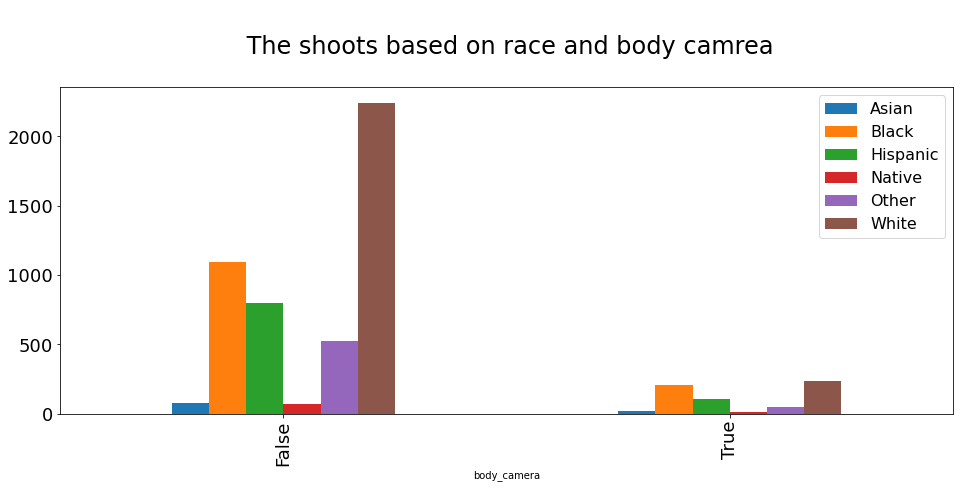

In [4]:
###################################################

#race aggregation
raceAgg= agg('race')
raceAgg.index=['White','Black','Hispanic','Asian','Native','Other']

# race,camera
raceBody_cameraAGG = show(agg(['race','body_camera']).unstack(0),col = 'race and body camrea')

In [5]:
#########     Names aggregation    ##############

###    Adding name columns

#drop NA's
data['name'].replace('TK TK',None,inplace=True)
# add
data['first name'] = data['name'].apply(lambda x : x.split()[0])
data['last name']  = data['name'].apply(lambda x : x.split()[-1]) 
  

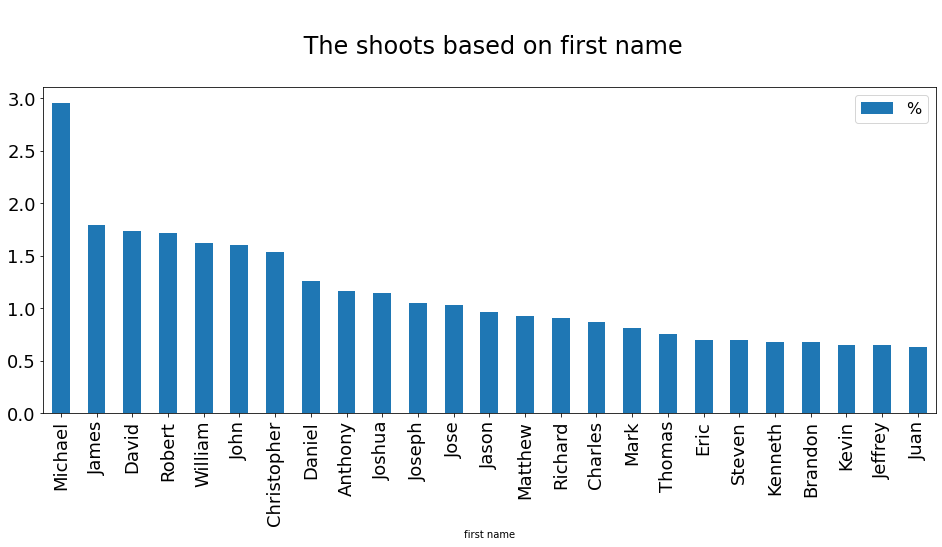

In [6]:
  
################

## pd.merge(df1, df2, how='left', left_on=['id_key'], right_on=['fk_key'])

killers = agg('first name',False)
killers.columns = ['numOfIncedents']

rows=data.shape[0]

#adding ratio
killers['%'] = killers['numOfIncedents'].apply(lambda x :(x*100/rows))
show(killers['%'][:25],'first name')


###################################################

In [24]:
killers

,numOfIncedents,%
first name,,
Michael,160,2.954210
James,97,1.790990
David,94,1.735598
Robert,93,1.717134
William,88,1.624815
...,...,...
Howard,1,0.018464
Horacio,1,0.018464
Homer,1,0.018464


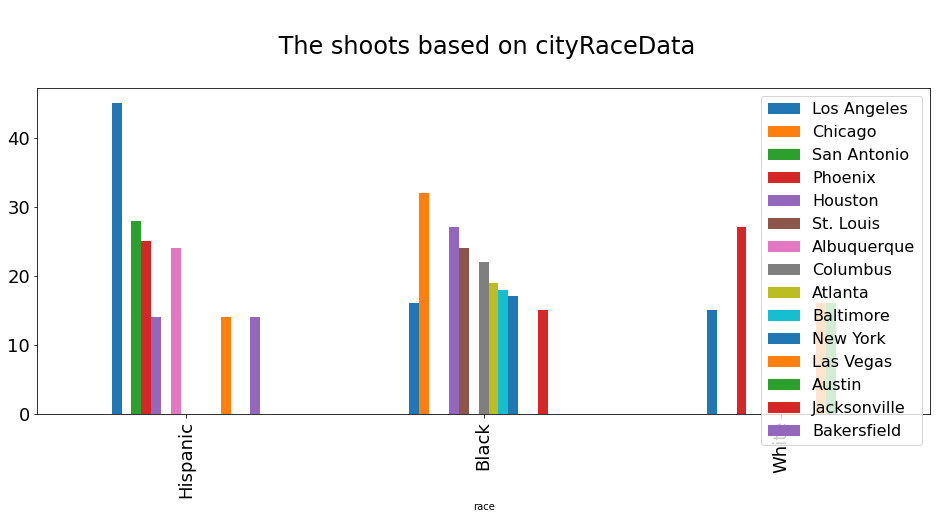

In [7]:
###     city state agg

#city agg
cityRaceData = agg(['city','race'])[:20].unstack(0)
show(cityRaceData,'cityRaceData')

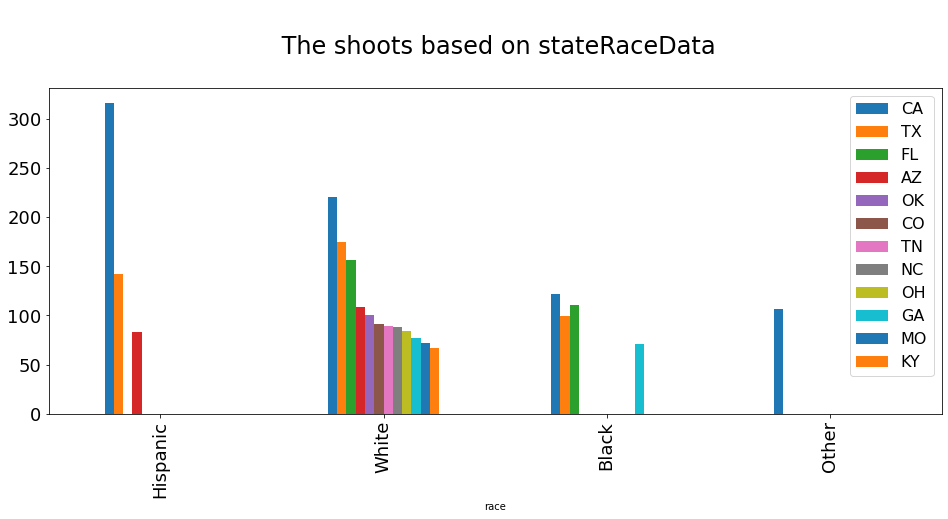

In [12]:
#state agg
stateRaceData = agg(['state','race'])[:20].unstack(0)
show(stateRaceData,'stateRaceData')

#######################

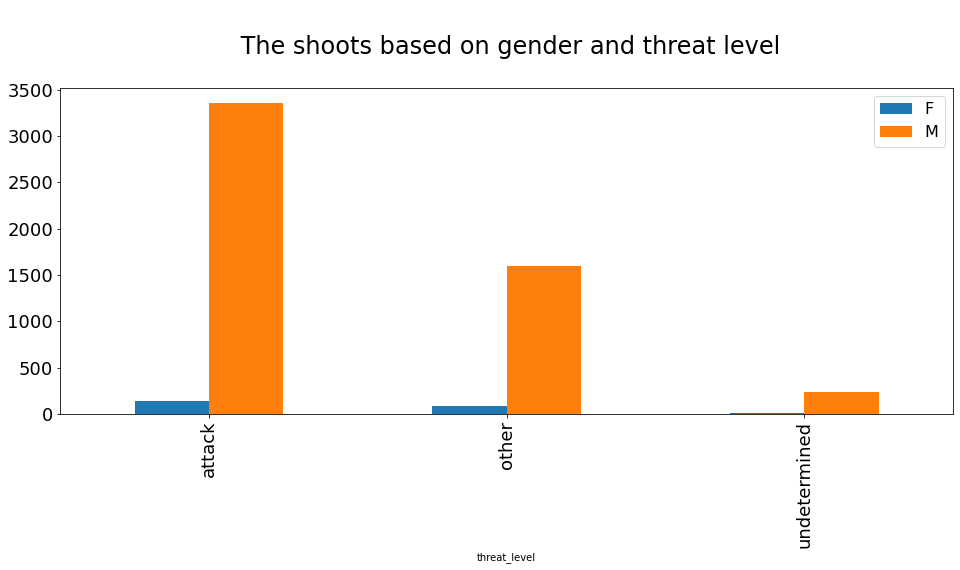

In [13]:
######      analyze shoots considering threats   #########


###      analyze toy weapon only


toyWeaponRecords = data[data['armed']=='toy weapon']

#cheack
toyWeaponRecords['armed'] #good!

### don't run - 'data' variable overrided:
## data = toyWeaponRecords.drop('armed',axis=1)

# analyze threat
toyWeaponThreat = agg(['gender', 'threat_level']).unstack(0)
show(toyWeaponThreat,'gender and threat level')

In [ ]:
""" it's understood that when a toy gun and female runs awat no shoots accured
    and anyway men were more likely to be shot."""

In [14]:
################################
    
   
 #show threatcolumns data only

threatCols = [data.columns[i] for i in [4,6,11]]#('gender','threat','weapon kind')
threatData = agg(threatCols).unstack(0)
 
# analyze [gender,threat,gun]- threats

threatCols = [data.columns[i] for i in [4,7,11]]  #[gender,threat,armed] 
threatData = agg(threatCols).unstack(0)


############################################################

#       state- city heatmap


#   adjust indexes

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

#reverse dictionary
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
#apply
data['state'] = data['state'].apply(lambda x: abbrev_us_state[x])



##############

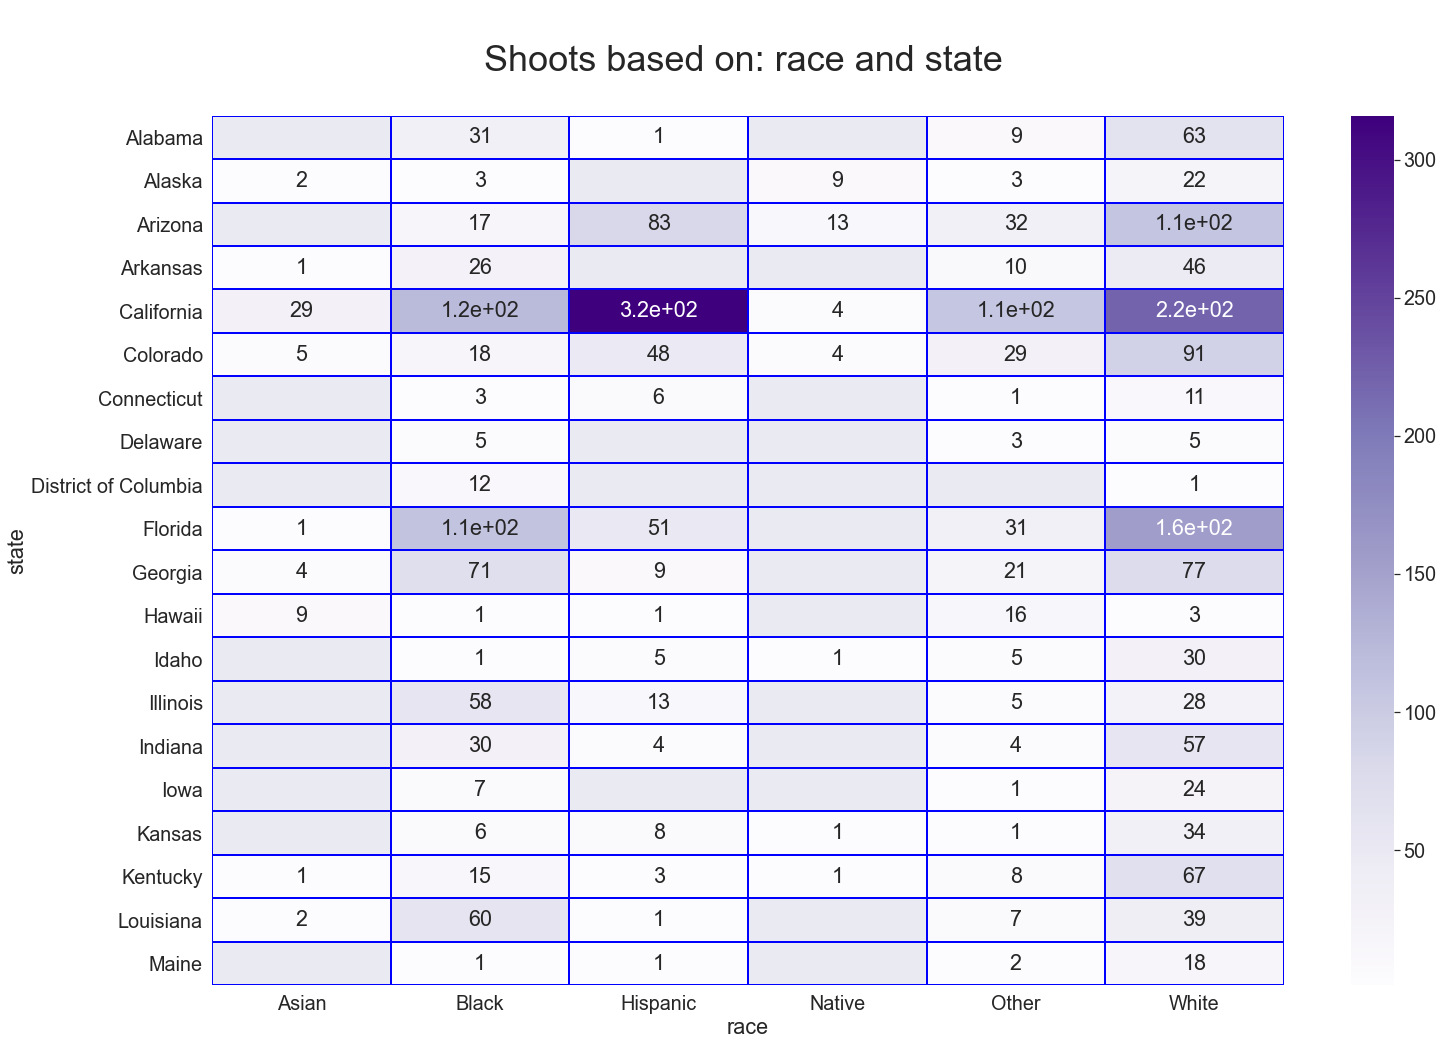

In [17]:
st='race -state'
sns.set(font_scale=1.8)
plt.figure(figsize=(24,16))
sns.heatmap(data = agg(['race','state']).unstack(0)[:20] ,lw=1 ,linecolor = 'blue',cmap = 'Purples',annot=True)
plt.title('\n Shoots based on: race and state  \n',fontsize = 36)
plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\Outputs data\Police shoots\'' + st + '.png')  


##########################################################

In [20]:
#########      year and date

#converting timeStamp to date time
data['date'] = data['date'].apply(lambda x : pd.to_datetime(x))

#extracting date details as additional columns
data['year'] = data['date'].apply(lambda x : x.year)
data['month'] = data['date'].apply(lambda x : x.month)

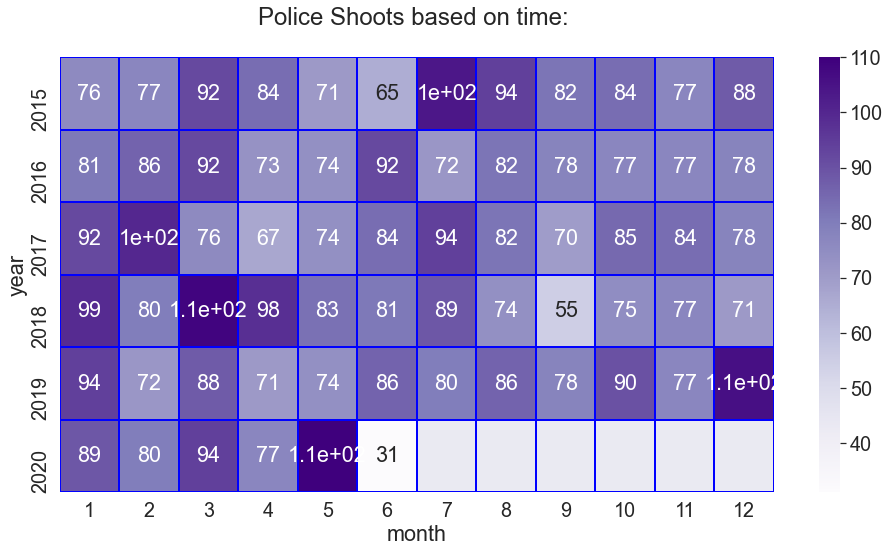

In [21]:
# heatmap based on year and month
### with '?' so no saving
heat(agg(['month','year']).unstack(0),st = 'time')

ValueError: The condensed distance matrix must contain only finite values.

<Figure size 1152x576 with 0 Axes>

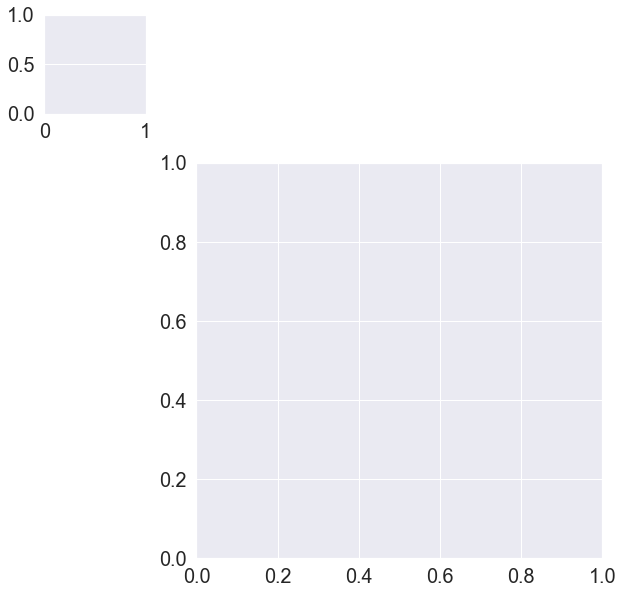

In [23]:
#clustermap
### missing something
sns.set(font_scale=1.8)
plt.figure(figsize=(16,8))
sns.clustermap(data = agg(['month','year']).unstack(0),lw=1 ,linecolor = 'blue',cmap = 'Purples', annot = True)



############################################


############    final!!!    ################


############################################